In [1]:
import pandas as pd
import numpy as np
from pandas import read_csv
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, recall_score, precision_score
from sklearn import metrics
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime

In [2]:
start_time = datetime.now()

In [3]:
bank=pd.read_csv('C:\\bank.csv')
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [4]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [5]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [6]:
missing_values = bank.isnull().mean()*100
missing_values.sum()

0.0

In [7]:
for col in bank.select_dtypes(include='object').columns:
    print(col)
    print(bank[col].unique())

job
['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']
marital
['married' 'single' 'divorced']
education
['secondary' 'tertiary' 'primary' 'unknown']
default
['no' 'yes']
housing
['yes' 'no']
loan
['no' 'yes']
contact
['unknown' 'cellular' 'telephone']
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome
['unknown' 'other' 'failure' 'success']
deposit
['yes' 'no']


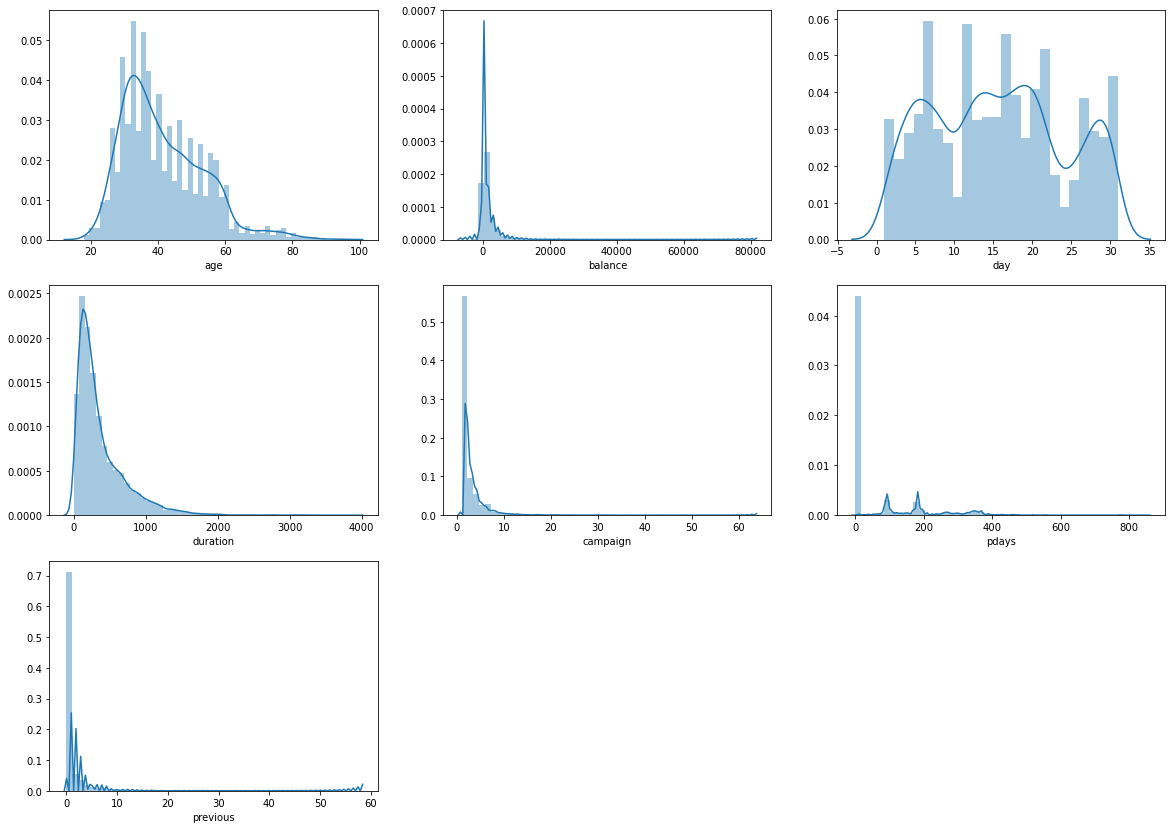

In [8]:
numerical_features = [feature for feature in bank.columns if ((bank[feature].dtypes != 'O') & (feature not in ['deposit']))]
plt.figure(figsize=(20,60))
plotnumber =1
for numerical_feature in numerical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.distplot(bank[numerical_feature])
    plt.xlabel(numerical_feature)
    plotnumber+=1
plt.show()

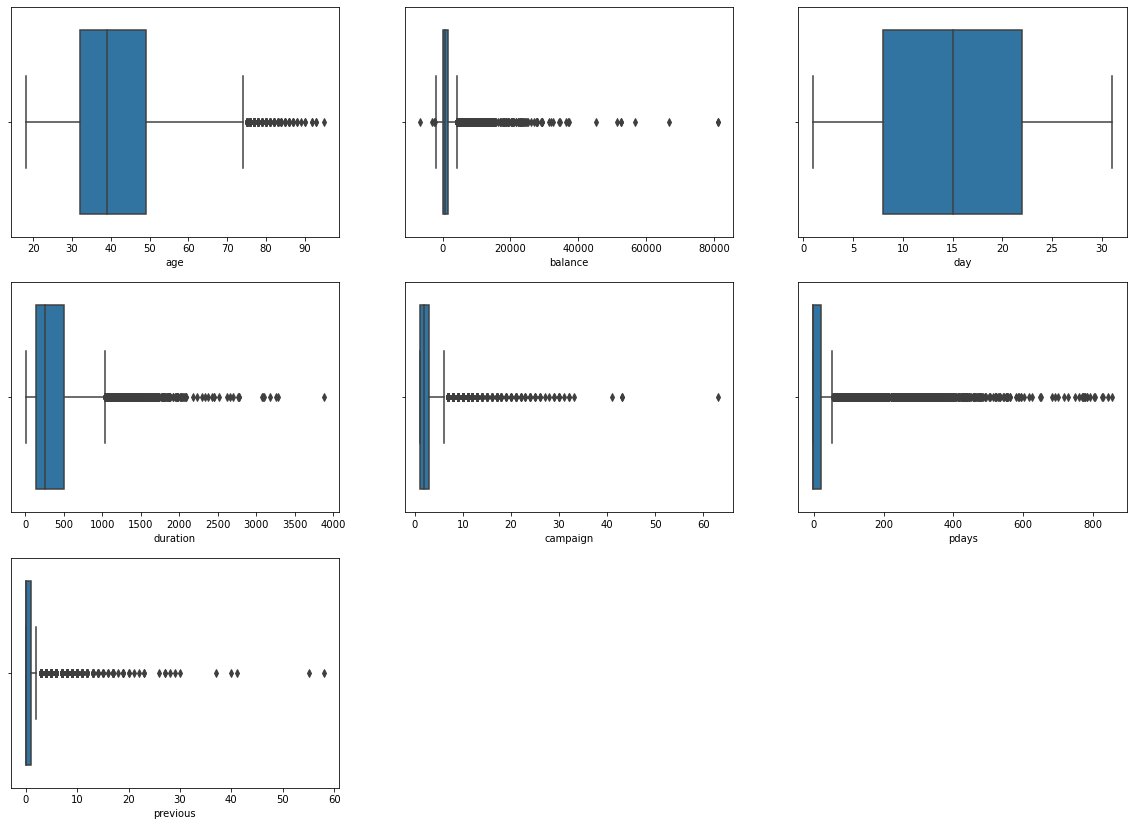

In [9]:
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for numerical_feature in numerical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(bank[numerical_feature])
    plt.xlabel(numerical_feature)
    plotnumber+=1
plt.show()

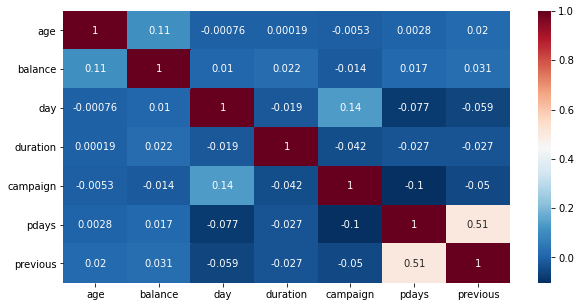

In [10]:
cor_mat=bank.corr()
fig = plt.figure(figsize=(10,5))
sns.heatmap(cor_mat,annot=True,cmap="RdBu_r")

In [11]:
bank = bank.copy()

In [12]:
Q1=bank['age'].quantile(q = 0.25)
Q2=bank['age'].quantile(q = 0.50)
Q3=bank['age'].quantile(q = 0.75)
Q4=bank['age'].quantile(q = 1.00)                        

IQR= Q3-Q1

print('1st Quartile: ', Q1)
print('2nd Quartile: ', Q2)
print('3rd Quartile: ', Q3)
print('4th Quartile: ', Q4)
print('IQR: ',IQR)

print('Age above: ', Q3 + 1.5*(IQR), 'are outliers')
print('Age below: ', Q1 - 1.5*(IQR), 'are outliers')

1st Quartile:  32.0
2nd Quartile:  39.0
3rd Quartile:  49.0
4th Quartile:  95.0
IQR:  17.0
Age above:  74.5 are outliers
Age below:  6.5 are outliers


In [13]:
def age(data):
    
    data.loc[data['age'] <= 32, 'age'] = 1
    data.loc[(data['age'] > 32) & (data['age'] <= 49), 'age'] = 2
    data.loc[(data['age'] > 49) & (data['age'] <= 74), 'age'] = 3
    data.loc[data['age'] > 74, 'age'] = 4
    
    return data

age(bank);
bank.age.value_counts()

2    5517
1    2980
3    2494
4     171
Name: age, dtype: int64

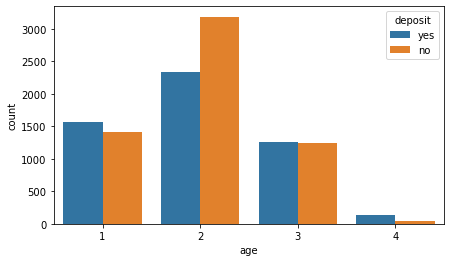

In [14]:
fig = plt.figure(figsize=(7,4))
sns.countplot(x='age',hue='deposit',data=bank)

In [15]:
bank['poutcome'] = bank['poutcome'].replace(['other'] , 'unknown')
bank.poutcome.value_counts()

unknown    8863
failure    1228
success    1071
Name: poutcome, dtype: int64

In [16]:
bank['default_cat'] = bank['default'].map( {'yes':1, 'no':0} )
bank.drop('default', axis=1,inplace = True)
bank["housing_cat"]=bank['housing'].map({'yes':1, 'no':0})
bank.drop('housing', axis=1,inplace = True)
bank["loan_cat"] = bank['loan'].map({'yes':1, 'no':0})
bank.drop('loan', axis=1, inplace=True)
bank["deposit_cat"] = bank['deposit'].map({'yes':1, 'no':0})
bank.drop('deposit', axis=1, inplace=True)

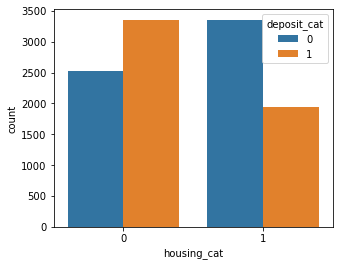

In [17]:
fig = plt.figure(figsize=(5,4))
sns.countplot(x='housing_cat',hue='deposit_cat',data=bank)

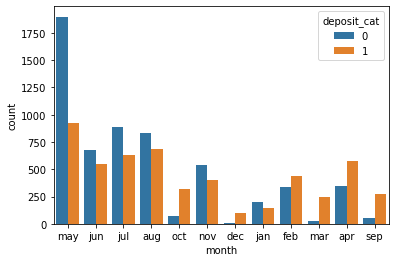

In [18]:
sns.countplot(x='month',hue='deposit_cat',data=bank)

In [19]:
bank["month_cat"]=bank['month'].map({'jan':1, 'feb':2, 'mar':3, 'apr':4, 'may':5, 
    'jun':6, 'jul':7, 'aug':8, 'sep':9, 'oct':10,
    'nov':11, 'dec':12})
bank.drop('month', axis=1,inplace = True)

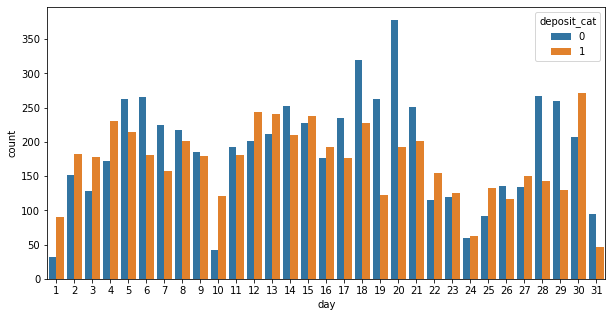

In [20]:
fig = plt.figure(figsize=(10,5))
sns.countplot(x='day',hue='deposit_cat',data=bank)

In [21]:
def day(data):
    data.loc[data['day'] <= 7, 'day'] = 1 
    data.loc[(data['day'] > 7) & (data['day'] <= 14), 'day'] = 2
    data.loc[(data['day'] > 14) & (data['day'] <= 21), 'day'] = 3
    data.loc[data['day'] > 21,  'day'] = 4
    return data
day(bank);
bank.day.value_counts()

3    3200
4    2812
2    2680
1    2470
Name: day, dtype: int64

In [22]:
bank['pdays'].describe()

count    11162.000000
mean        51.330407
std        108.758282
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         20.750000
max        854.000000
Name: pdays, dtype: float64

No handles with labels found to put in legend.


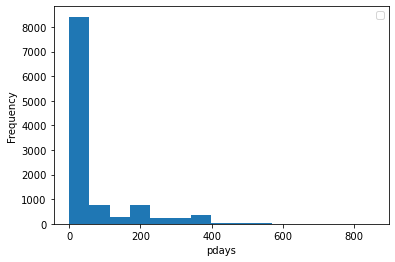

In [23]:
plt.hist(bank.pdays,bins=15) 
plt.xlabel("pdays")
plt.ylabel("Frequency")
plt.legend()
plt.show()

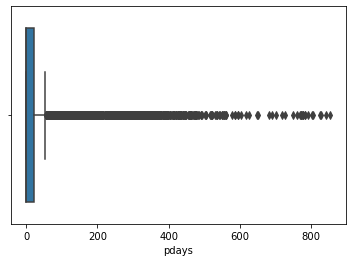

In [24]:
bank_pdays=bank["pdays"]
sns.boxplot(x=bank_pdays)

In [25]:
def pdays(data):
    data.loc[(data['pdays'] > 0) & (data['pdays'] <= 100), 'pdays'] = 2 
    data.loc[(data['pdays'] > 100 ),'pdays']=1
    data.loc[data['pdays'] == -1, 'pdays'] = 0 #pdays_not_contacted
    return data
pdays(bank);
bank.pdays.value_counts()

0    8324
1    2078
2     760
Name: pdays, dtype: int64

In [26]:
bank.job.value_counts()

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64

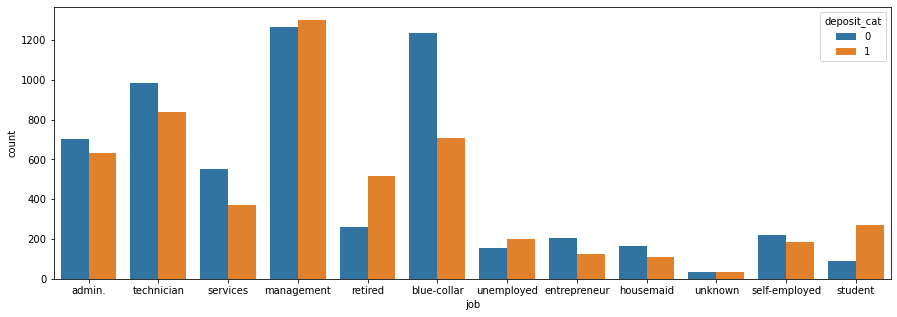

In [27]:
fig = plt.figure(figsize=(15,5))
sns.countplot(x='job',hue='deposit_cat',data=bank)

No handles with labels found to put in legend.


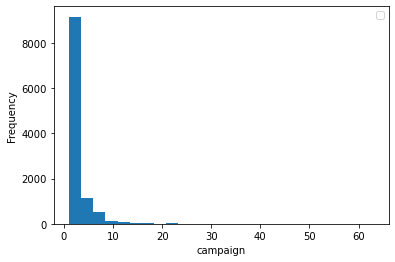

In [28]:
plt.hist(bank.campaign,bins=25) 
plt.xlabel("campaign")
plt.ylabel("Frequency")
plt.legend()
plt.show()

In [29]:
bank.campaign.value_counts()

1     4798
2     3028
3     1321
4      771
5      378
6      265
7      139
8      128
9       72
10      52
11      40
13      30
12      29
14      15
17      14
15      13
16       9
18       8
21       8
24       5
19       5
20       5
30       4
22       4
26       3
23       3
25       3
43       2
29       2
32       2
63       1
33       1
41       1
31       1
28       1
27       1
Name: campaign, dtype: int64

In [30]:
Q1=bank['campaign'].quantile(q = 0.25)
Q2=bank['campaign'].quantile(q = 0.50)
Q3=bank['campaign'].quantile(q = 0.75)
Q4=bank['campaign'].quantile(q = 1.00)                        

IQR= Q3-Q1

print('1st Quartile: ', Q1)
print('2nd Quartile: ', Q2)
print('3rd Quartile: ', Q3)
print('4th Quartile: ', Q4)
print('IQR: ',IQR)


print('Campaign above: ', Q3 + 1.5*(IQR), 'are outliers')
print('Campaign below: ', Q1 - 1.5*(IQR), 'are outliers')

1st Quartile:  1.0
2nd Quartile:  2.0
3rd Quartile:  3.0
4th Quartile:  63.0
IQR:  2.0
Campaign above:  6.0 are outliers
Campaign below:  -2.0 are outliers


In [31]:
def campaign(data):
    data.loc[data['campaign'] == 1, 'campaign'] = 1 
    data.loc[data['campaign'] == 2, 'campaign'] = 2 
    data.loc[(data['campaign'] >= 3) & (data['campaign'] <= 6), 'campaign'] = 3
    data.loc[data['campaign'] > 6, 'campaign'] = 4
    return data
campaign(bank);
bank.campaign.value_counts()

1    4798
2    3028
3    2735
4     601
Name: campaign, dtype: int64

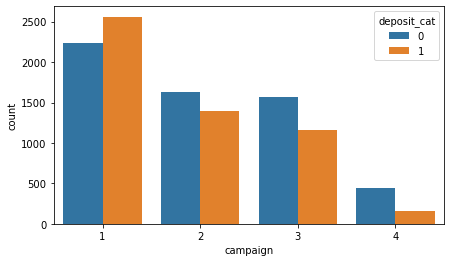

In [32]:
fig = plt.figure(figsize=(7,4))
sns.countplot(x='campaign',hue='deposit_cat',data=bank)

No handles with labels found to put in legend.


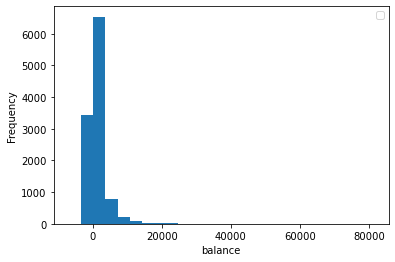

In [33]:
plt.hist(bank.balance,bins=25) 
plt.xlabel("balance")
plt.ylabel("Frequency")
plt.legend()
plt.show()

In [34]:
bank.balance.describe()

count    11162.000000
mean      1528.538524
std       3225.413326
min      -6847.000000
25%        122.000000
50%        550.000000
75%       1708.000000
max      81204.000000
Name: balance, dtype: float64

In [35]:
bank.balance.value_counts()

0       774
1        39
3        35
2        34
4        29
       ... 
4641      1
2975      1
918       1
2959      1
7561      1
Name: balance, Length: 3805, dtype: int64

In [36]:
Q1=bank['balance'].quantile(q = 0.25)
Q2=bank['balance'].quantile(q = 0.50)
Q3=bank['balance'].quantile(q = 0.75)
Q4=bank['balance'].quantile(q = 1.00)                        

IQR= Q3-Q1

print('1st Quartile: ', Q1)
print('2nd Quartile: ', Q2)
print('3rd Quartile: ', Q3)
print('4th Quartile: ', Q4)
print('IQR: ',IQR)


print('Balance above: ', Q3 + 1.5*(IQR), 'are outliers')
print('Balance below: ', Q1 - 1.5*(IQR), 'are outliers')

1st Quartile:  122.0
2nd Quartile:  550.0
3rd Quartile:  1708.0
4th Quartile:  81204.0
IQR:  1586.0
Balance above:  4087.0 are outliers
Balance below:  -2257.0 are outliers


In [37]:
def balance(data):
    data.loc[data['balance'] <= 122, 'balance'] = 0 
    data.loc[(data['balance'] > 122) & (data['balance'] <= 550), 'balance'] = 1
    data.loc[(data['balance'] > 550) & (data['balance'] <= 1708), 'balance'] = 2
    data.loc[(data['balance'] > 1708) & (data['balance'] <= 4087), 'balance'] = 3
    data.loc[data['balance'] > 4087, 'balance'] = 4
    return data
balance(bank);
bank.balance.value_counts()

0    2792
1    2791
2    2789
3    1739
4    1051
Name: balance, dtype: int64

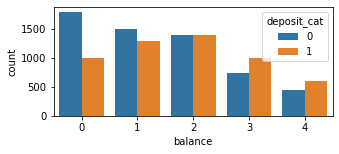

In [38]:
fig = plt.figure(figsize=(5,2))
sns.countplot(x='balance',hue='deposit_cat',data=bank)

In [39]:
bank.previous.value_counts()

0     8324
1      887
2      693
3      435
4      244
5      165
6      117
7       77
8       60
9       34
10      30
11      23
12      16
17      11
13      11
14       6
15       5
19       4
16       2
27       2
23       2
20       2
58       1
26       1
18       1
28       1
41       1
21       1
29       1
37       1
40       1
22       1
30       1
55       1
Name: previous, dtype: int64

In [40]:
Q1=bank['previous'].quantile(q = 0.25)
Q2=bank['previous'].quantile(q = 0.50)
Q3=bank['previous'].quantile(q = 0.75)
Q4=bank['previous'].quantile(q = 1.00)                        

IQR= Q3-Q1

print('1st Quartile: ', Q1)
print('2nd Quartile: ', Q2)
print('3rd Quartile: ', Q3)
print('4th Quartile: ', Q4)
print('IQR: ',IQR)

print('Previous above: ', Q3 + 1.5*(IQR), 'are outliers')
print('previous below: ', Q1 - 1.5*(IQR), 'are outliers')

1st Quartile:  0.0
2nd Quartile:  0.0
3rd Quartile:  1.0
4th Quartile:  58.0
IQR:  1.0
Previous above:  2.5 are outliers
previous below:  -1.5 are outliers


In [41]:
def previous(data):
    data.loc[data['previous'] == 0, 'previous'] = 0 
    data.loc[data['previous'] == 1, 'previous'] = 1
    data.loc[(data['previous'] > 1) & (data['previous'] <= 2.5), 'previous'] = 2
    data.loc[data['previous'] > 2.5, 'previous'] = 3
    return data
previous(bank);
bank.previous.value_counts()

0    8324
3    1258
1     887
2     693
Name: previous, dtype: int64

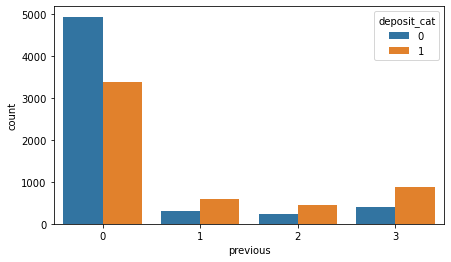

In [42]:
fig = plt.figure(figsize=(7,4))
sns.countplot(x='previous',hue='deposit_cat',data=bank)

In [43]:
bank.marital.value_counts()

married     6351
single      3518
divorced    1293
Name: marital, dtype: int64

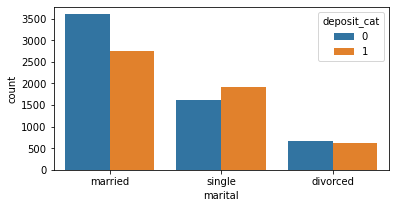

In [44]:
fig = plt.figure(figsize=(6,3))
sns.countplot(x='marital',hue='deposit_cat',data=bank)

In [45]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
bank['job']      = labelencoder_X.fit_transform(bank['job']) 
bank['marital']  = labelencoder_X.fit_transform(bank['marital']) 
bank['education']= labelencoder_X.fit_transform(bank['education'])
bank['poutcome']= labelencoder_X.fit_transform(bank['poutcome'])
bank['contact']=labelencoder_X.fit_transform(bank['contact'])

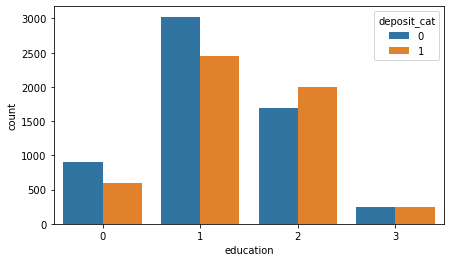

In [46]:
fig = plt.figure(figsize=(7,4))
sns.countplot(x='education',hue='deposit_cat',data=bank)

In [47]:
bank.education.value_counts()

1    5476
2    3689
0    1500
3     497
Name: education, dtype: int64

In [48]:
bank.duration.describe()

count    11162.000000
mean       371.993818
std        347.128386
min          2.000000
25%        138.000000
50%        255.000000
75%        496.000000
max       3881.000000
Name: duration, dtype: float64

In [49]:
Q1=bank['duration'].quantile(q = 0.25)
Q2=bank['duration'].quantile(q = 0.50)
Q3=bank['duration'].quantile(q = 0.75)
Q4=bank['duration'].quantile(q = 1.00)                        

IQR= Q3-Q1

print('1st Quartile: ', Q1)
print('2nd Quartile: ', Q2)
print('3rd Quartile: ', Q3)
print('4th Quartile: ', Q4)
print('IQR: ',IQR)


print('Duration above: ', Q3 + 1.5*(IQR), 'are outliers')
print('Duration below: ', Q1 - 1.5*(IQR), 'are outliers')

1st Quartile:  138.0
2nd Quartile:  255.0
3rd Quartile:  496.0
4th Quartile:  3881.0
IQR:  358.0
Duration above:  1033.0 are outliers
Duration below:  -399.0 are outliers


In [50]:
def duration(data):

    data.loc[data['duration'] <= 138, 'duration'] = 1
    data.loc[(data['duration'] > 138) & (data['duration'] <= 255)  , 'duration']    = 2
    data.loc[(data['duration'] > 255) & (data['duration'] <= 496)  , 'duration']   = 3
    data.loc[(data['duration'] > 496) & (data['duration'] <= 1033), 'duration'] = 4
    data.loc[data['duration']  > 1033, 'duration'] = 5

    return data
duration(bank);
bank.duration.value_counts()

1    2800
2    2792
3    2783
4    2151
5     636
Name: duration, dtype: int64

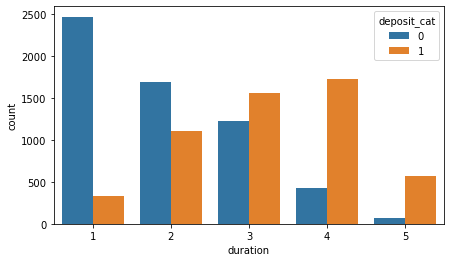

In [51]:
fig = plt.figure(figsize=(7,4))
sns.countplot(x='duration',hue='deposit_cat',data=bank)

In [52]:
bank

,age,job,marital,education,balance,contact,day,duration,campaign,pdays,previous,poutcome,default_cat,housing_cat,loan_cat,deposit_cat,month_cat
0,3,0,1,1,3,2,1,5,1,0,0,2,0,1,0,1,5
1,3,0,1,1,0,2,1,5,1,0,0,2,0,0,0,1,5
2,2,9,1,1,2,2,1,5,1,0,0,2,0,1,0,1,5
3,3,7,1,1,3,2,1,4,1,0,0,2,0,1,0,1,5
4,3,0,1,2,1,2,1,4,2,0,0,2,0,0,0,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,2,1,2,0,0,0,3,3,1,0,0,2,0,1,0,0,4
11158,2,7,1,1,2,2,3,1,3,0,0,2,0,0,0,0,6
11159,1,9,2,1,0,0,3,2,2,0,0,2,0,0,0,0,8
11160,2,9,1,1,0,0,2,1,2,1,3,0,0,0,1,0,5


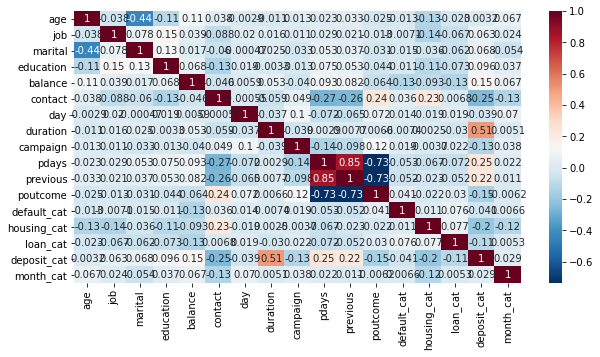

In [53]:
cor_mat=bank.corr()
fig = plt.figure(figsize=(10,5))
sns.heatmap(cor_mat,annot=True,cmap="RdBu_r")

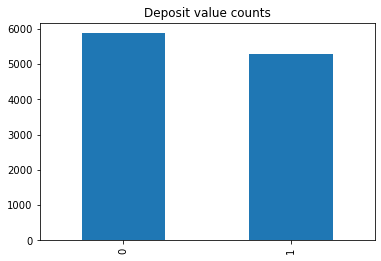

In [54]:
value_counts = bank['deposit_cat'].value_counts()
value_counts.plot.bar(title = 'Deposit value counts')

In [55]:
features=['age','job','marital','education','default_cat', 'balance', 'housing_cat', 'loan_cat','month_cat','contact',
           'day','duration','campaign','pdays','previous', 'poutcome']
X=bank[features]
y=bank['deposit_cat'] 
cv = StratifiedKFold(n_splits = 2, shuffle=True, random_state = 1)

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [57]:
testing = pd.DataFrame(columns = ["Classifier", "Precision", "Recall", "F1-Score", "Accuracy"])

# DECISION TREE CLASSIFIER

In [58]:
params = {
            "criterion" : ["gini", "entropy"], 
            "splitter" : ["best", "random"], 
            "max_depth" : [25, 50, 75, None],
            "min_samples_split" : [3, 6], 
            "min_samples_leaf" : [2, 4],  
        }
dtree = RandomizedSearchCV(estimator = DecisionTreeClassifier(class_weight = "balanced", 
                                                      presort = True), param_distributions = params, cv = cv, 
                   n_jobs = -1, scoring = "accuracy")
dtree.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=2, random_state=1, shuffle=True),
                   estimator=DecisionTreeClassifier(class_weight='balanced',
                                                    presort=True),
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [25, 50, 75, None],
                                        'min_samples_leaf': [2, 4],
                                        'min_samples_split': [3, 6],
                                        'splitter': ['best', 'random']},
                   scoring='accuracy')

In [59]:
pred_dtree = dtree.predict_proba(X_test)

In [60]:
dtree.best_params_

{'splitter': 'best',
 'min_samples_split': 3,
 'min_samples_leaf': 4,
 'max_depth': 50,
 'criterion': 'gini'}

In [61]:
DTC=dtree.best_score_
DTC

0.7995296200636572

In [62]:
prc = precision_score(y_test, dtree.predict(X_test))
rcs = recall_score(y_test, dtree.predict(X_test))
f1 = f1_score(y_test, dtree.predict(X_test))
acc = accuracy_score(y_test, dtree.predict(X_test))

print("Precision on test data is : %0.3f" %prc)
print("Recall on test data is : %0.3f" %rcs)
print("F1-Score on test data is : %0.3f" %f1)
print("Accuracy on test data is : %0.3f" %acc)
print(confusion_matrix(y_test, dtree.predict(X_test)))

testing.loc[-1] = ["Decision Tree", prc, rcs, f1, acc]
testing.index = testing.index + 1
testing = testing.sort_index()

Precision on test data is : 0.768
Recall on test data is : 0.816
F1-Score on test data is : 0.792
Accuracy on test data is : 0.802
[[952 253]
 [189 839]]


# K-NEAREST NEIGHBOR

In [63]:
k_range = list(range(1,31))
weight_options = ["uniform", "distance"]
metric_options = ["euclidean", "manhattan"]
param_grid = dict(n_neighbors = k_range, weights = weight_options, metric = metric_options)
#knn = KNeighborsClassifier()
#grid = GridSearchCV(knn, param_grid, cv = cv, scoring = "f1")
knn = RandomizedSearchCV(KNeighborsClassifier(), param_grid, cv = cv, scoring = "accuracy")
knn.fit(X_train,y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=2, random_state=1, shuffle=True),
                   estimator=KNeighborsClassifier(),
                   param_distributions={'metric': ['euclidean', 'manhattan'],
                                        'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8,
                                                        9, 10, 11, 12, 13, 14,
                                                        15, 16, 17, 18, 19, 20,
                                                        21, 22, 23, 24, 25, 26,
                                                        27, 28, 29, 30],
                                        'weights': ['uniform', 'distance']},
                   scoring='accuracy')

In [64]:
print (knn.best_params_)

{'weights': 'distance', 'n_neighbors': 17, 'metric': 'manhattan'}


In [65]:
pred_knn = knn.predict_proba(X_test)

In [66]:
KNN=knn.best_score_
KNN

0.8090490754454198

In [67]:
prc = precision_score(y_test, knn.predict(X_test))
rcs = recall_score(y_test, knn.predict(X_test))
f1 = f1_score(y_test, knn.predict(X_test))
acc = accuracy_score(y_test, knn.predict(X_test))

print("Precision on test data is : %0.3f" %prc)
print("Recall on test data is : %0.3f" %rcs)
print("F1-Score on test data is : %0.3f" %f1)
print("Accuracy on test data is : %0.3f" %acc)
print(confusion_matrix(y_test, knn.predict(X_test)))

testing.loc[-1] = ["K-Nearest Neighbor", prc, rcs, f1, acc]
testing.index = testing.index + 1
testing = testing.sort_index()

Precision on test data is : 0.792
Recall on test data is : 0.816
F1-Score on test data is : 0.804
Accuracy on test data is : 0.816
[[984 221]
 [189 839]]


# SUPPORT VECTOR MACHINE

In [68]:
params = [
            {"C" : [0.3, 1.0, 3.0], "kernel" : ["poly"],
              "degree" : [2, 3, 4],
              "gamma" : ["auto", 0.1, 0.3]
            },
            {"C" : [0.3, 1.0, 3.0], "kernel" : ["rbf", "sigmoid"], 
              "gamma" : ["auto", 0.1, 0.3]},
            {"C" : [0.3, 1.0, 3.0], "kernel" : ["linear"]}
        ]
svm = RandomizedSearchCV(estimator = SVC(probability=True, class_weight = "balanced", max_iter = 5000, verbose = True), 
                         param_distributions = params, 
                   cv = cv, n_jobs = -1, scoring = "accuracy", verbose = 2)
svm.fit(X_train, y_train)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  1.4min finished


[LibSVM]

RandomizedSearchCV(cv=StratifiedKFold(n_splits=2, random_state=1, shuffle=True),
                   estimator=SVC(class_weight='balanced', max_iter=5000,
                                 probability=True, verbose=True),
                   n_jobs=-1,
                   param_distributions=[{'C': [0.3, 1.0, 3.0],
                                         'degree': [2, 3, 4],
                                         'gamma': ['auto', 0.1, 0.3],
                                         'kernel': ['poly']},
                                        {'C': [0.3, 1.0, 3.0],
                                         'gamma': ['auto', 0.1, 0.3],
                                         'kernel': ['rbf', 'sigmoid']},
                                        {'C': [0.3, 1.0, 3.0],
                                         'kernel': ['linear']}],
                   scoring='accuracy', verbose=2)

In [69]:
svm.best_params_

{'kernel': 'rbf', 'gamma': 'auto', 'C': 1.0}

In [70]:
pred_svm = svm.predict_proba(X_test)

In [71]:
SVM=svm.best_score_
SVM

0.8242804197923315

In [72]:
prc = precision_score(y_test, svm.predict(X_test))
rcs = recall_score(y_test, svm.predict(X_test))
f1 = f1_score(y_test, svm.predict(X_test))
acc = accuracy_score(y_test, svm.predict(X_test))

print("Precision on test data is : %0.3f" %prc)
print("Recall on test data is : %0.3f" %rcs)
print("F1-Score on test data is : %0.3f" %f1)
print("Accuracy on test data is : %0.3f" %acc)
print(confusion_matrix(y_test, svm.predict(X_test)))

testing.loc[-1] = ["Support Vector Machine", prc, rcs, f1, acc]
testing.index = testing.index + 1
testing = testing.sort_index()

Precision on test data is : 0.768
Recall on test data is : 0.875
F1-Score on test data is : 0.818
Accuracy on test data is : 0.821
[[933 272]
 [128 900]]


# GAUSSIAN NAIVE BAYES

In [73]:
params = {}
gnb = RandomizedSearchCV(estimator= GaussianNB(), param_distributions = params, cv = cv, n_jobs = -1, scoring = "accuracy")
gnb.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=2, random_state=1, shuffle=True),
                   estimator=GaussianNB(), n_jobs=-1, param_distributions={},
                   scoring='accuracy')

In [74]:
GaussianNB().get_params().keys()

dict_keys(['priors', 'var_smoothing'])

In [75]:
pred_gnb = gnb.predict_proba(X_test)

In [76]:
GNB=gnb.best_score_
GNB

0.7365880133013843

In [77]:
prc = precision_score(y_test, gnb.predict(X_test))
rcs = recall_score(y_test, gnb.predict(X_test))
f1 = f1_score(y_test, gnb.predict(X_test))
acc = accuracy_score(y_test, gnb.predict(X_test))

print("Precision on test data is : %0.3f" %prc)
print("Recall on test data is : %0.3f" %rcs)
print("F1-Score on test data is : %0.3f" %f1)
print("Accuracy on test data is : %0.3f" %acc)
print(confusion_matrix(y_test, gnb.predict(X_test)))

testing.loc[-1] = ["Gaussian Naive Bayes", prc, rcs, f1, acc]
testing.index = testing.index + 1
testing = testing.sort_index()

Precision on test data is : 0.698
Recall on test data is : 0.716
F1-Score on test data is : 0.707
Accuracy on test data is : 0.727
[[887 318]
 [292 736]]


# MULTI LAYER PERCEPTRON

In [78]:
params = [
            {
                "hidden_layer_sizes" : [(50, ), (50, 50), (50, 50, 50)],
                "solver" : ["adam", "lbfgs"], 
                "alpha" : [0.0001, 0.001], 
                "max_iter" : [100, 200]
            },
            {
                "hidden_layer_sizes" : [(50, ), (50, 50), (50, 50, 50)],
                "solver" : ["sgd"], 
                "alpha" : [0.0001, 0.001], 
                "learning_rate" : ["constant", "invscaling", "adaptive"], 
                "max_iter" : [100, 200]
            }
]
mlp = RandomizedSearchCV(estimator = MLPClassifier(early_stopping = True, activation = "relu"), 
                         param_distributions = params, cv = cv, n_jobs = -1, scoring = "accuracy")
mlp.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=2, random_state=1, shuffle=True),
                   estimator=MLPClassifier(early_stopping=True), n_jobs=-1,
                   param_distributions=[{'alpha': [0.0001, 0.001],
                                         'hidden_layer_sizes': [(50,), (50, 50),
                                                                (50, 50, 50)],
                                         'max_iter': [100, 200],
                                         'solver': ['adam', 'lbfgs']},
                                        {'alpha': [0.0001, 0.001],
                                         'hidden_layer_sizes': [(50,), (50, 50),
                                                                (50, 50, 50)],
                                         'learning_rate': ['constant',
                                                           'invscaling',
                                                           'adaptive'],
                                     

In [79]:
mlp.best_params_

{'solver': 'lbfgs',
 'max_iter': 100,
 'hidden_layer_sizes': (50, 50),
 'alpha': 0.001}

In [80]:
pred_mlp = mlp.predict_proba(X_test)

In [81]:
MLP=mlp.best_score_
MLP

0.8109524196558657

In [82]:
prc = precision_score(y_test, mlp.predict(X_test))
rcs = recall_score(y_test, mlp.predict(X_test))
f1 = f1_score(y_test, mlp.predict(X_test))
acc = accuracy_score(y_test, mlp.predict(X_test))

print("Precision on test data is : %0.3f" %prc)
print("Recall on test data is : %0.3f" %rcs)
print("F1-Score on test data is : %0.3f" %f1)
print("Accuracy on test data is : %0.3f" %acc)
print(confusion_matrix(y_test, mlp.predict(X_test)))

testing.loc[-1] = ["Multilayer Perceptron", prc, rcs, f1, acc]
testing.index = testing.index + 1
testing = testing.sort_index()

Precision on test data is : 0.762
Recall on test data is : 0.860
F1-Score on test data is : 0.808
Accuracy on test data is : 0.812
[[929 276]
 [144 884]]


# LOGISTIC REGRESSION 

In [83]:
params = [
            {
                "penalty" : ['l2'], 
                "C" : [0.01, 0.1, 1.0, 10.0], 
                "solver" : ["sag"], 
                "max_iter" : [100, 200]
            },
            {
                "penalty" : ['l1'], 
                "C" : [0.01, 0.1, 1.0, 10.0], 
                "solver" : ["saga"], 
                "max_iter" : [100, 200]
            }
]
lr = RandomizedSearchCV(estimator = LogisticRegression(n_jobs = -1, class_weight = "balanced"), 
                        param_distributions = params, cv = cv, n_jobs = -1, scoring = "accuracy")
lr.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=2, random_state=1, shuffle=True),
                   estimator=LogisticRegression(class_weight='balanced',
                                                n_jobs=-1),
                   n_jobs=-1,
                   param_distributions=[{'C': [0.01, 0.1, 1.0, 10.0],
                                         'max_iter': [100, 200],
                                         'penalty': ['l2'], 'solver': ['sag']},
                                        {'C': [0.01, 0.1, 1.0, 10.0],
                                         'max_iter': [100, 200],
                                         'penalty': ['l1'],
                                         'solver': ['saga']}],
                   scoring='accuracy')

In [84]:
lr.best_params_

{'solver': 'saga', 'penalty': 'l1', 'max_iter': 100, 'C': 1.0}

In [85]:
pred_lm = lr.predict_proba(X_test)

In [86]:
LR=lr.best_score_
LR

0.7930337310904807

In [87]:
prc = precision_score(y_test, lr.predict(X_test))
rcs = recall_score(y_test, lr.predict(X_test))
f1 = f1_score(y_test, lr.predict(X_test))
acc = accuracy_score(y_test, lr.predict(X_test))

print("Precision on test data is : %0.3f" %prc)
print("Recall on test data is : %0.3f" %rcs)
print("F1-Score on test data is : %0.3f" %f1)
print("Accuracy on test data is : %0.3f" %acc)
print(confusion_matrix(y_test, mlp.predict(X_test)))

testing.loc[-1] = ["Logistic Regression", prc, rcs, f1, acc ]
testing.index = testing.index + 1
testing = testing.sort_index()

Precision on test data is : 0.751
Recall on test data is : 0.805
F1-Score on test data is : 0.777
Accuracy on test data is : 0.788
[[929 276]
 [144 884]]


# RANDOM FOREST CLASSIFIER

In [88]:
params = {
            "n_estimators" : [50, 100, 150, 200, 250], 
            "criterion" : ["gini", "entropy"], 
            "max_depth" : [None, 2, 3, 4, 5],
            "min_samples_split" : [3, 6], 
            "min_samples_leaf" : [2, 4]}
rfc = RandomizedSearchCV(estimator = RandomForestClassifier(class_weight = "balanced", n_jobs = -1), 
                         param_distributions = params, cv = cv, n_jobs = -1, scoring = "accuracy")
rfc.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=2, random_state=1, shuffle=True),
                   estimator=RandomForestClassifier(class_weight='balanced',
                                                    n_jobs=-1),
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 2, 3, 4, 5],
                                        'min_samples_leaf': [2, 4],
                                        'min_samples_split': [3, 6],
                                        'n_estimators': [50, 100, 150, 200,
                                                         250]},
                   scoring='accuracy')

In [89]:
#f1_score(y_test, rfc.predict(X_test))

In [90]:
rfc.best_params_

{'n_estimators': 250,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_depth': 5,
 'criterion': 'entropy'}

In [91]:
pred_rfc = rfc.predict_proba(X_test)

In [92]:
RFC=rfc.best_score_
RFC

0.8155450396753724

In [93]:
prc = precision_score(y_test, rfc.predict(X_test))
rcs = recall_score(y_test, rfc.predict(X_test))
f1 = f1_score(y_test, rfc.predict(X_test))
acc = accuracy_score(y_test, rfc.predict(X_test))

print("Precision on test data is : %0.3f" %prc)
print("Recall on test data is : %0.3f" %rcs)
print("F1-Score on test data is : %0.3f" %f1)
print("Accuracy on test data is : %0.3f" %acc)
print(confusion_matrix(y_test, rfc.predict(X_test)))

testing.loc[-1] = ["Random Forest", prc, rcs, f1, acc ]
testing.index = testing.index + 1
testing = testing.sort_index()

Precision on test data is : 0.743
Recall on test data is : 0.844
F1-Score on test data is : 0.791
Accuracy on test data is : 0.794
[[905 300]
 [160 868]]


In [94]:
rfc.best_estimator_.feature_importances_

array([4.04601719e-03, 6.63602219e-03, 5.34504164e-03, 4.12244201e-03,
       3.37868393e-04, 1.69268811e-02, 5.46247423e-02, 9.00972395e-03,
       6.64773285e-02, 1.13121047e-01, 7.28520152e-03, 5.34692973e-01,
       1.09198790e-02, 5.53192011e-02, 4.64708098e-02, 6.46648211e-02])

In [95]:
feature_imp = pd.Series(rfc.best_estimator_.feature_importances_,index=features).sort_values(ascending=False)
round(feature_imp,3)

duration       0.535
contact        0.113
month_cat      0.066
poutcome       0.065
pdays          0.055
housing_cat    0.055
previous       0.046
balance        0.017
campaign       0.011
loan_cat       0.009
day            0.007
job            0.007
marital        0.005
education      0.004
age            0.004
default_cat    0.000
dtype: float64

No handles with labels found to put in legend.


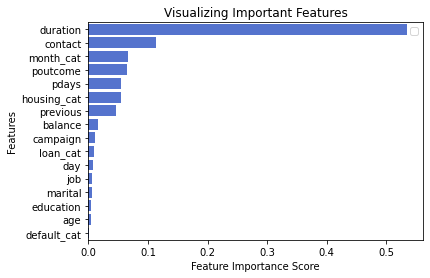

In [96]:
sns.barplot(x=feature_imp, y=feature_imp.index,color='RoyalBlue')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [97]:
result=round(testing,3)
result.sort_values('Accuracy',ascending=False)

,Classifier,Precision,Recall,F1-Score,Accuracy
4,Support Vector Machine,0.768,0.875,0.818,0.821
5,K-Nearest Neighbor,0.792,0.816,0.804,0.816
2,Multilayer Perceptron,0.762,0.860,0.808,0.812
6,Decision Tree,0.768,0.816,0.792,0.802
0,Random Forest,0.743,0.844,0.791,0.794
1,Logistic Regression,0.751,0.805,0.777,0.788
3,Gaussian Naive Bayes,0.698,0.716,0.707,0.727


In [98]:
models = pd.DataFrame({
                'Classifier': ['Decision Tree Classifier', 'Support Vector Machine','Random Forest', 
                           'K-Nearest Neighbor','Gaussian Naive Bayes', 
                           'Multilayer Perceptron', 'Logistics Regression'],
                'Accuracy Score':  [DTC, SVM, RFC, KNN, GNB, MLP, LR]})
training_test_result=round(models,3)
training_test_result.sort_values(by='Accuracy Score', ascending=False)

,Classifier,Accuracy Score
1,Support Vector Machine,0.824
2,Random Forest,0.816
5,Multilayer Perceptron,0.811
3,K-Nearest Neighbor,0.809
0,Decision Tree Classifier,0.800
6,Logistics Regression,0.793
4,Gaussian Naive Bayes,0.737


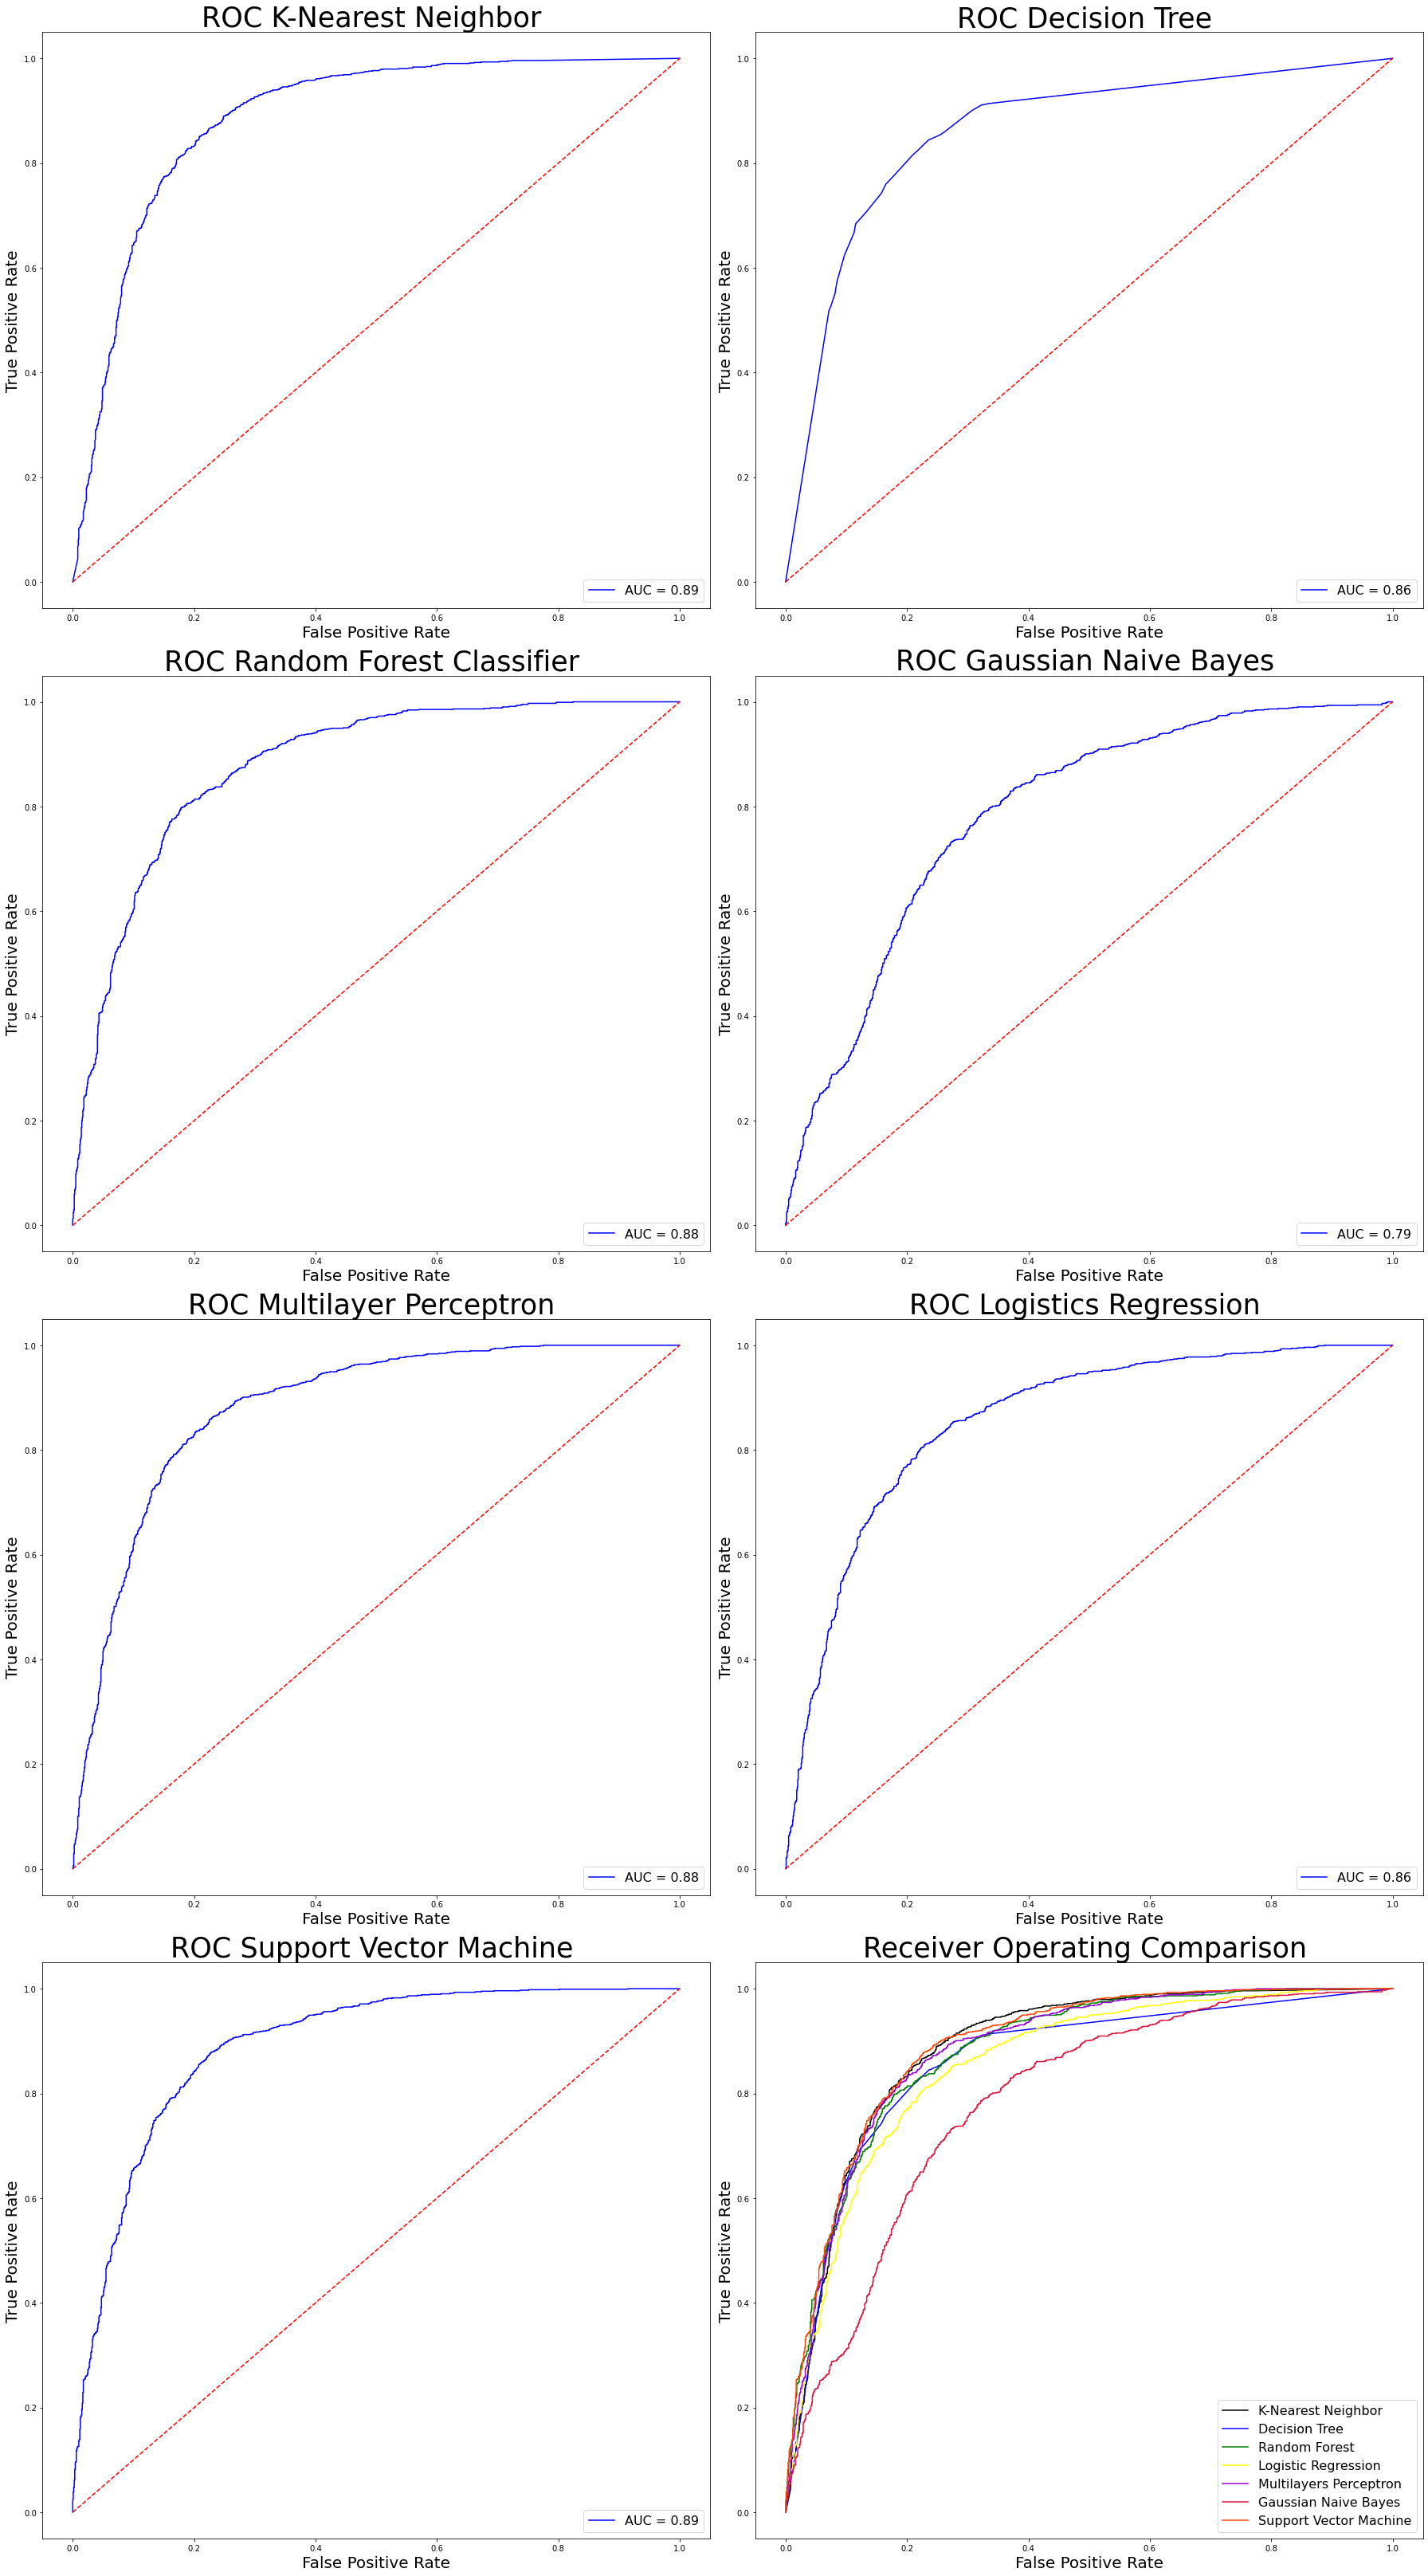

In [99]:
fig, ax_arr = plt.subplots(nrows = 4, ncols = 2, figsize = (25,45))

#K-Nearest Neighbor
probs = knn.predict_proba(X_test)
preds = probs[:,1]
fprknn, tprknn, thresholdknn = metrics.roc_curve(y_test, preds)
roc_aucknn = metrics.auc(fprknn, tprknn)

ax_arr[0,0].plot(fprknn, tprknn, 'b', label = 'AUC = %0.2f' % roc_aucknn)
ax_arr[0,0].plot([0, 1], [0, 1],'r--')
ax_arr[0,0].set_title('ROC K-Nearest Neighbor ',fontsize=35)
ax_arr[0,0].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[0,0].set_xlabel('False Positive Rate',fontsize=20)
ax_arr[0,0].legend(loc = 'lower right', prop={'size': 16})

#Decision Tree
probs = dtree.predict_proba(X_test)
preds = probs[:,1]
fprdtree, tprdtree,thresholddtree = metrics.roc_curve(y_test, preds)
roc_aucdtree = metrics.auc(fprdtree, tprdtree)

ax_arr[0,1].plot(fprdtree, tprdtree, 'b', label = 'AUC = %0.2f' % roc_aucdtree)
ax_arr[0,1].plot([0, 1], [0, 1],'r--')
ax_arr[0,1].set_title('ROC Decision Tree ',fontsize=35)
ax_arr[0,1].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[0,1].set_xlabel('False Positive Rate',fontsize=20)
ax_arr[0,1].legend(loc = 'lower right', prop={'size': 16})


#Random Forest Classifier
probs = rfc.predict_proba(X_test)
preds = probs[:,1]
fprrfc, tprrfc, thresholdrfc = metrics.roc_curve(y_test, preds)
roc_aucrfc = metrics.auc(fprrfc, tprrfc)

ax_arr[1,0].plot(fprrfc, tprrfc, 'b', label = 'AUC = %0.2f' % roc_aucrfc)
ax_arr[1,0].plot([0, 1], [0, 1],'r--')
ax_arr[1,0].set_title('ROC Random Forest Classifier ',fontsize=35)
ax_arr[1,0].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[1,0].set_xlabel('False Positive Rate',fontsize=20)
ax_arr[1,0].legend(loc = 'lower right', prop={'size': 16})

#Gaussian Naive Bayes
probs = gnb.predict_proba(X_test)
preds = probs[:,1]
fprgnb, tprgnb, thresholdgnb = metrics.roc_curve(y_test, preds)
roc_aucgnb = metrics.auc(fprgnb, tprgnb)

ax_arr[1,1].plot(fprgnb, tprgnb, 'b', label = 'AUC = %0.2f' % roc_aucgnb)
ax_arr[1,1].plot([0, 1], [0, 1],'r--')
ax_arr[1,1].set_title('ROC Gaussian Naive Bayes ',fontsize=35)
ax_arr[1,1].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[1,1].set_xlabel('False Positive Rate',fontsize=20)
ax_arr[1,1].legend(loc = 'lower right', prop={'size': 16})

#Multilayer Perceptron
probs = mlp.predict_proba(X_test)
preds = probs[:,1]
fprmlp, tprmlp, thresholdmlp = metrics.roc_curve(y_test, preds)
roc_aucmlp = metrics.auc(fprmlp, tprmlp)

ax_arr[2,0].plot(fprmlp, tprmlp, 'b', label = 'AUC = %0.2f' % roc_aucmlp)
ax_arr[2,0].plot([0, 1], [0, 1],'r--')
ax_arr[2,0].set_title('ROC Multilayer Perceptron ',fontsize=35)
ax_arr[2,0].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[2,0].set_xlabel('False Positive Rate',fontsize=20)
ax_arr[2,0].legend(loc = 'lower right', prop={'size': 16})

#Logistics Regression
probs = lr.predict_proba(X_test)
preds = probs[:,1]
fprlr, tprlr, thresholdlr = metrics.roc_curve(y_test, preds)
roc_auclr = metrics.auc(fprlr, tprlr)

ax_arr[2,1].plot(fprlr, tprlr, 'b', label = 'AUC = %0.2f' % roc_auclr)
ax_arr[2,1].plot([0, 1], [0, 1],'r--')
ax_arr[2,1].set_title('ROC Logistics Regression ',fontsize=35)
ax_arr[2,1].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[2,1].set_xlabel('False Positive Rate',fontsize=20)
ax_arr[2,1].legend(loc = 'lower right', prop={'size': 16})

#Support Vector Machine
probs = svm.predict_proba(X_test)
preds = probs[:,1]
fprsvm, tprsvm, thresholdsvm = metrics.roc_curve(y_test, preds)
roc_aucsvm = metrics.auc(fprsvm, tprsvm)

ax_arr[3,0].plot(fprsvm, tprsvm, 'b', label = 'AUC = %0.2f' % roc_aucsvm)
ax_arr[3,0].plot([0, 1], [0, 1],'r--')
ax_arr[3,0].set_title('ROC Support Vector Machine ',fontsize=35)
ax_arr[3,0].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[3,0].set_xlabel('False Positive Rate',fontsize=20)
ax_arr[3,0].legend(loc = 'lower right', prop={'size': 16})

#ALL PLOTS ----------------------------------
ax_arr[3,1].plot(fprknn, tprknn, 'b', label = 'K-Nearest Neighbor', color='black')
ax_arr[3,1].plot(fprdtree, tprdtree, 'b', label = 'Decision Tree', color='blue')
#ax_arr[1,2].plot(fprknn, tprknn, 'b', label = 'Knn', color='brown')
ax_arr[3,1].plot(fprrfc, tprrfc, 'b', label = 'Random Forest', color='green')
ax_arr[3,1].plot(fprlr, tprlr, 'b', label = 'Logistic Regression', color='yellow')
ax_arr[3,1].plot(fprmlp, tprmlp, 'b', label = 'Multilayers Perceptron', color='darkviolet')
ax_arr[3,1].plot(fprgnb, tprgnb, 'b', label = 'Gaussian Naive Bayes', color='crimson')
ax_arr[3,1].plot(fprsvm, tprsvm, 'b', label = 'Support Vector Machine', color='orangered')

ax_arr[3,1].set_title('Receiver Operating Comparison ',fontsize=35)
ax_arr[3,1].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[3,1].set_xlabel('False Positive Rate',fontsize=20)
ax_arr[3,1].legend(loc = 'lower right', prop={'size': 16})

plt.subplots_adjust(wspace=0.2)
plt.tight_layout()

In [100]:
end_time=datetime.now()
print("Duration: {}".format (end_time - start_time))

Duration: 0:03:27.590600
